<a href="https://colab.research.google.com/github/manojkt14/ML-Project1-Housing-test-using-Random-Forest/blob/main/Colab_ML1_Project__Housing_dataset_Random_Forest_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

In [ ]:
!cat /proc/meminfo

MemTotal:       13289416 kB
MemFree:         9674576 kB
MemAvailable:   12309308 kB
Buffers:           90112 kB
Cached:          2744568 kB
SwapCached:            0 kB
Active:           401500 kB
Inactive:        2971844 kB
Active(anon):       1328 kB
Inactive(anon):   539228 kB
Active(file):     400172 kB
Inactive(file):  2432616 kB
Unevictable:           8 kB
Mlocked:               8 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               240 kB
Writeback:             0 kB
AnonPages:        538708 kB
Mapped:           395424 kB
Shmem:              1884 kB
KReclaimable:      86088 kB
Slab:             120952 kB
SReclaimable:      86088 kB
SUnreclaim:        34864 kB
KernelStack:        5232 kB
PageTables:         8320 kB
SecPageTables:         0 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6644708 kB
Committed_AS:    2577804 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       11860 kB
VmallocChunk:    

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
# loading sample data from colab
df = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


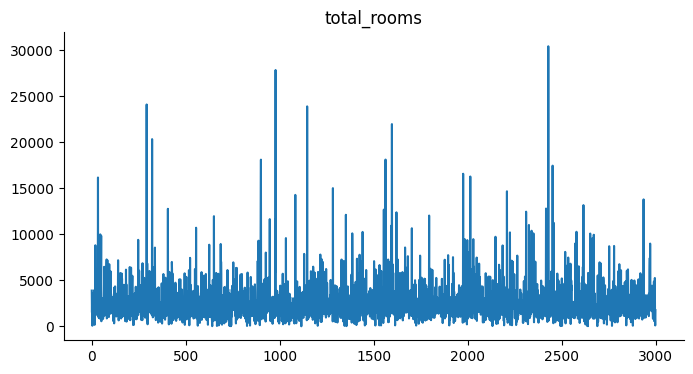

In [ ]:
# @title total_rooms

from matplotlib import pyplot as plt
df['total_rooms'].plot(kind='line', figsize=(8, 4), title='total_rooms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# converting a dataframe into g_sheet
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1zCRCCQ3fqqZCH7XU1GudYj6GRlrAoOmD6uQ1ciwEotI/edit#gid=0


In [ ]:
!ls

sample_data


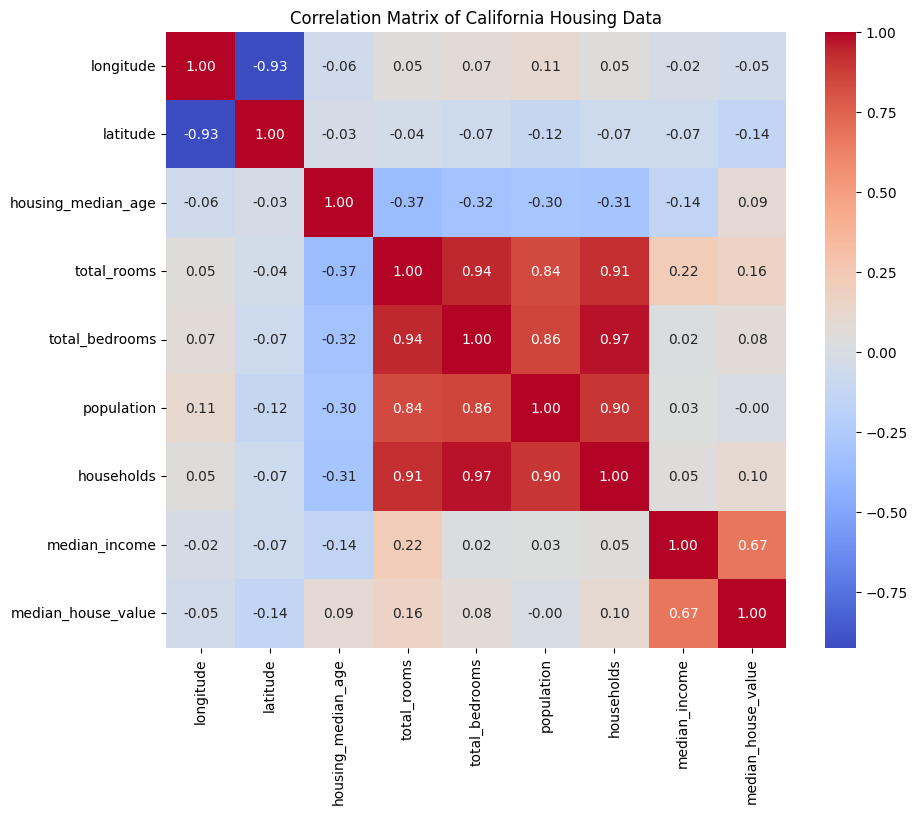

In [ ]:
# finding a correlation between each columns in dataset
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of California Housing Data')
plt.show()

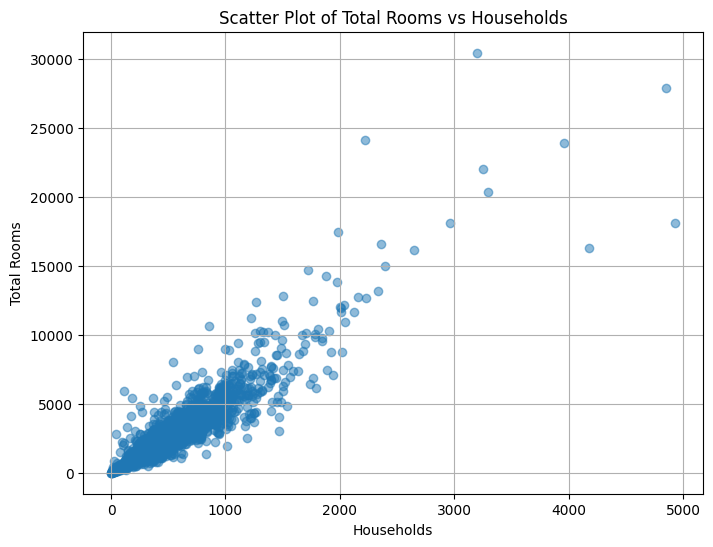

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for households vs total_rooms
plt.figure(figsize=(8, 6))
plt.scatter(df['households'], df['total_rooms'], alpha=0.5)
plt.xlabel('Households')
plt.ylabel('Total Rooms')
plt.title('Scatter Plot of Total Rooms vs Households')
plt.grid(True)
plt.show()


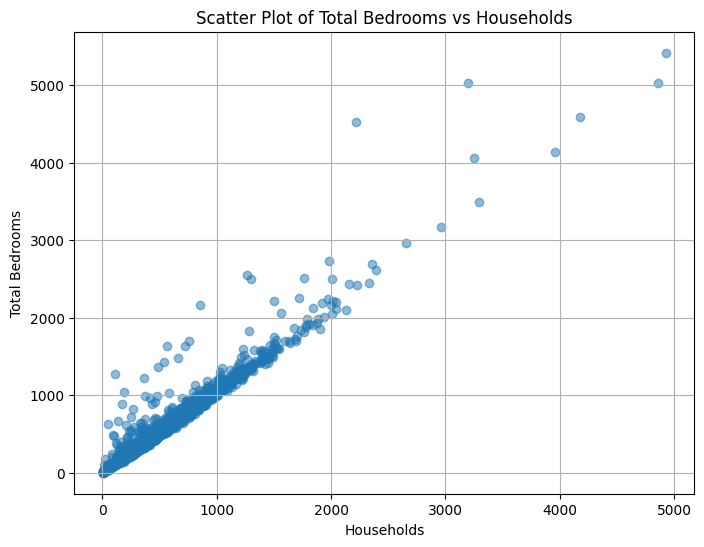

In [ ]:
# Scatter plot for households vs total_bedrooms
plt.figure(figsize=(8, 6))
plt.scatter(df['households'], df['total_bedrooms'], alpha=0.5)
plt.xlabel('Households')
plt.ylabel('Total Bedrooms')
plt.title('Scatter Plot of Total Bedrooms vs Households')
plt.grid(True)
plt.show()


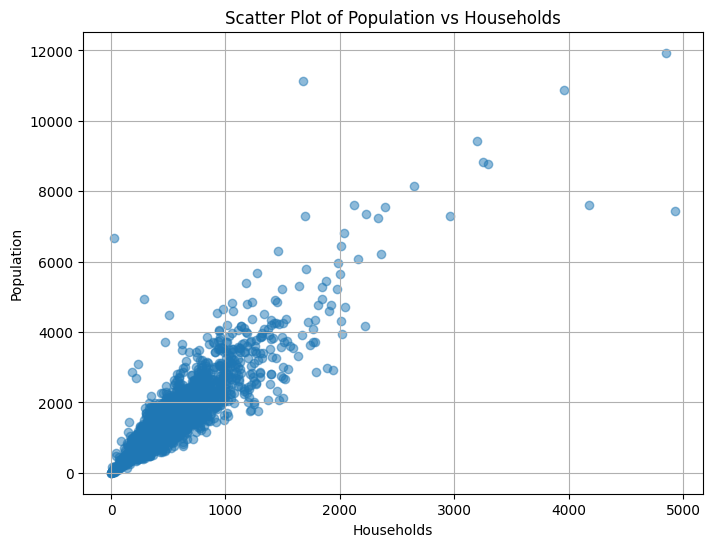

In [ ]:
# Scatter plot for households vs population
plt.figure(figsize=(8, 6))
plt.scatter(df['households'], df['population'], alpha=0.5)
plt.xlabel('Households')
plt.ylabel('Population')
plt.title('Scatter Plot of Population vs Households')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import zscore
import numpy as np

# Calculate Z-scores for numerical columns
# We'll exclude 'ocean_proximity' as it's not numerical
numerical_cols = df.select_dtypes(include=np.number).columns
z_scores = df[numerical_cols].apply(zscore)

# Define a threshold for identifying outliers
threshold = 3

# Find rows where any numerical column has a Z-score above the threshold
outlier_rows_zscore = df[(np.abs(z_scores) > threshold).any(axis=1)]

print(f"Number of potential outliers found using Z-score (threshold={threshold}): {len(outlier_rows_zscore)}")
print("\nPotential outlier rows (based on Z-score):")
display(outlier_rows_zscore)

Number of potential outliers found using Z-score (threshold=3): 122

Potential outlier rows (based on Z-score):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
33,-118.08,34.55,5.0,16181.0,2971.0,8152.0,2651.0,4.5237,141800.0
42,-118.06,34.15,37.0,1980.0,226.0,697.0,226.0,15.0001,500001.0
45,-117.24,33.17,4.0,9998.0,1874.0,3925.0,1672.0,4.2826,237500.0
49,-117.99,33.78,19.0,7399.0,1698.0,3554.0,1593.0,3.1049,173900.0
50,-120.99,37.70,14.0,9849.0,1887.0,4356.0,1780.0,3.5877,160900.0
...,...,...,...,...,...,...,...,...,...
2671,-117.84,34.04,4.0,9959.0,1544.0,4904.0,1429.0,6.9754,402500.0
2779,-119.01,35.40,11.0,8739.0,2190.0,4781.0,1919.0,1.7109,44600.0
2869,-117.43,33.55,8.0,446.0,62.0,188.0,68.0,9.4356,465600.0
2924,-117.23,32.88,18.0,5566.0,1465.0,6303.0,1458.0,1.8580,205000.0


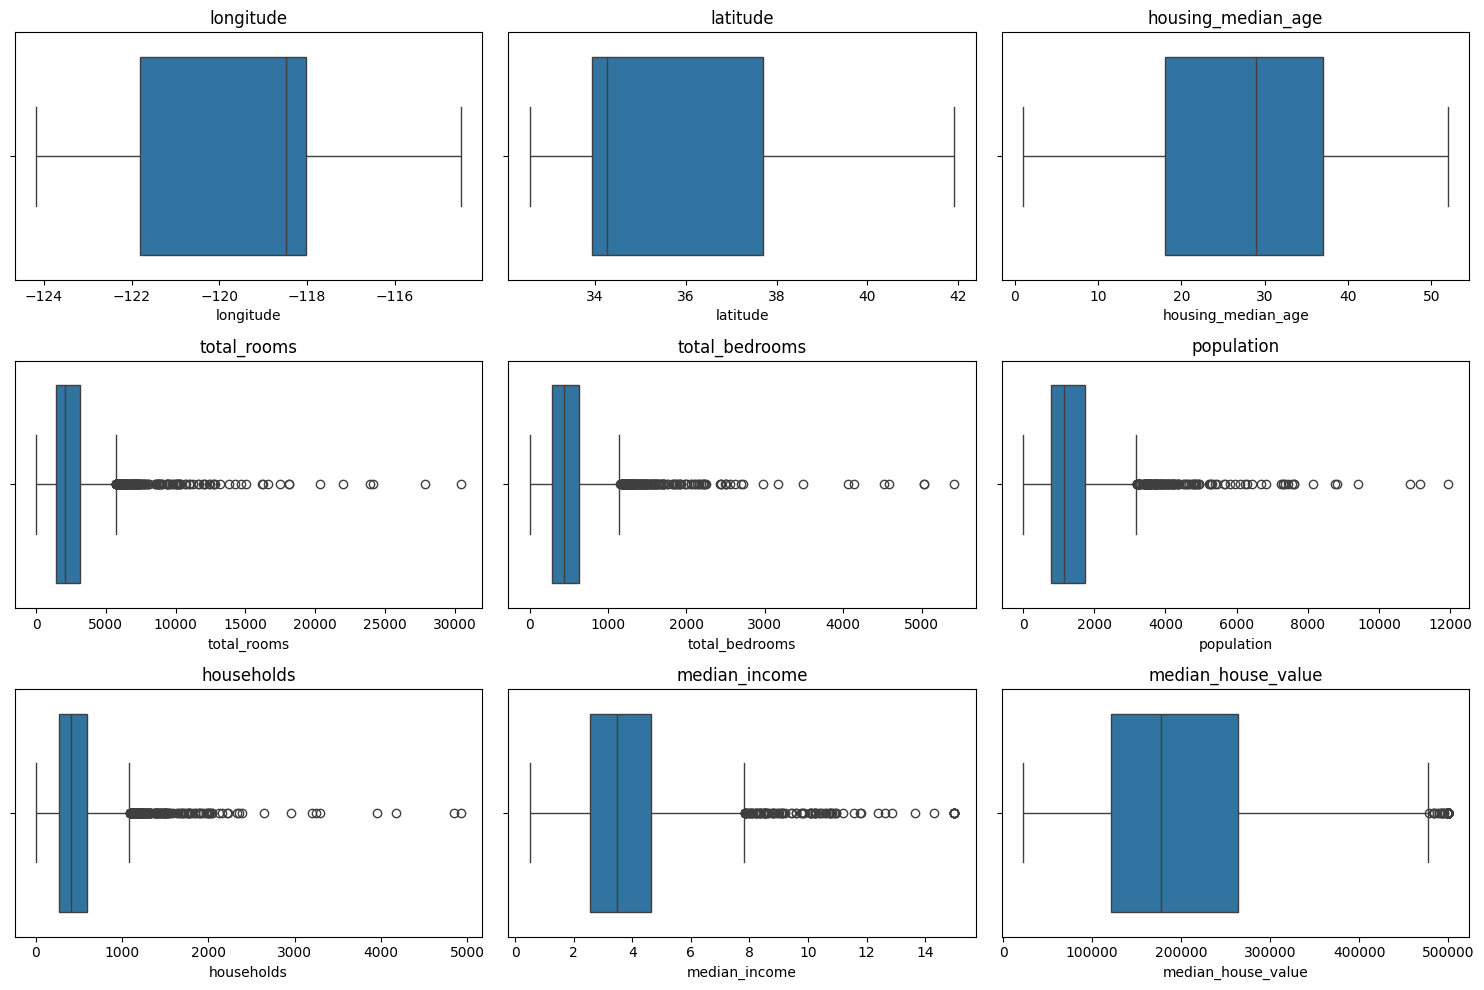

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns for box plots
numerical_cols = df.select_dtypes(include=np.number).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('median_house_value', axis=1)  # Features are all columns except the target
y = df['median_house_value']  # Target variable is 'median_house_value'

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data splitting complete.
Shape of X_train: (2400, 8)
Shape of X_test: (600, 8)
Shape of y_train: (2400,)
Shape of y_test: (600,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
# You can adjust parameters like n_estimators (number of trees)
model = RandomForestRegressor(n_estimators=100, random_state=22)

# Train the model using the training data
model.fit(X_train, y_train)

print("Random Forest Regressor model training complete.")

Random Forest Regressor model training complete.


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE) on the test set: {rmse:.2f}")

Root Mean Squared Error (RMSE) on the test set: 58111.01


In [ ]:
import pandas as pd

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Calculate the difference (error)
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']

# Display the comparison DataFrame
display(comparison_df.head())

# You can also display the absolute difference or squared difference
comparison_df['Absolute_Difference'] = np.abs(comparison_df['Difference'])
comparison_df['Squared_Difference'] = comparison_df['Difference']**2

display(comparison_df.head())

# You can also sort by the absolute difference to see where the largest errors occur
display(comparison_df.sort_values(by='Absolute_Difference', ascending=False).head())

,Actual,Predicted,Difference
1801,119400.0,96534.00,22866.00
1190,133600.0,157644.02,-24044.02
1817,173600.0,226761.02,-53161.02
251,218600.0,180374.00,38226.00
2505,276700.0,251997.05,24702.95


,Actual,Predicted,Difference,Absolute_Difference,Squared_Difference
1801,119400.0,96534.00,22866.00,22866.00,5.228540e+08
1190,133600.0,157644.02,-24044.02,24044.02,5.781149e+08
1817,173600.0,226761.02,-53161.02,53161.02,2.826094e+09
251,218600.0,180374.00,38226.00,38226.00,1.461227e+09
2505,276700.0,251997.05,24702.95,24702.95,6.102357e+08


,Actual,Predicted,Difference,Absolute_Difference,Squared_Difference
741,493200.0,227014.00,266186.00,266186.00,7.085499e+10
283,500001.0,267948.03,232052.97,232052.97,5.384858e+10
1814,475000.0,252390.13,222609.87,222609.87,4.955515e+10
2555,40000.0,257483.04,-217483.04,217483.04,4.729887e+10
1089,417600.0,205435.02,212164.98,212164.98,4.501398e+10


# Task
Tune the hyperparameters of the Random Forest Regressor model using GridSearchCV or RandomizedSearchCV to improve its performance on the California Housing dataset.

## Import necessary libraries

### Subtask:
Import necessary libraries


**Reasoning**:
The subtask is to import the necessary libraries for hyperparameter tuning. I need to import `GridSearchCV` and `RandomForestRegressor`. `RandomForestRegressor` was already imported, so I only need to import `GridSearchCV`.



In [ ]:
from sklearn.model_selection import GridSearchCV

## Define the parameter grid/distributions

### Subtask:
Specify the range of hyperparameters and their values or distributions to search over for the Random Forest Regressor model.


**Reasoning**:
Define the hyperparameter grid for the Random Forest Regressor model.



In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

print("Hyperparameter grid defined:")
print(param_grid)

Hyperparameter grid defined:
{'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


## Set up cross-validation

### Subtask:
Set up cross-validation to be used during the hyperparameter search.


**Reasoning**:
Set up cross-validation by importing KFold and instantiating it with specified parameters.



In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, shuffle=True, random_state=42)

print("Cross-validation object (KFold) created with 5 splits, shuffled, and random_state=42.")

Cross-validation object (KFold) created with 5 splits, shuffled, and random_state=42.


## Perform the hyperparameter search

### Subtask:
Perform the hyperparameter search using GridSearchCV to find the best hyperparameters for the Random Forest Regressor model on the training data.


**Reasoning**:
Perform the hyperparameter search using GridSearchCV.



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=12),
                           param_grid=param_grid,
                           cv=cv,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters found:")
print(grid_search.best_params_)

Best hyperparameters found:
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_tuned = best_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the tuned model
mse_tuned = mean_squared_error(y_test, y_pred_tuned)

# Calculate the Root Mean Squared Error (RMSE) for the tuned model
rmse_tuned = np.sqrt(mse_tuned)

print(f"Root Mean Squared Error (RMSE) on the test set with tuned hyperparameters: {rmse_tuned:.2f}")

# You can also compare it to the original model's RMSE
# Make sure you have the original 'rmse' variable from the previous evaluation
# print(f"Original model RMSE: {rmse:.2f}")
# print(f"Improvement in RMSE: {rmse - rmse_tuned:.2f}")

Root Mean Squared Error (RMSE) on the test set with tuned hyperparameters: 57917.70


# Here's a summary of what we did:

1. We loaded the California housing dataset.
2. We split the data into training and testing sets.
3. We trained an initial Random Forest Regressor model and evaluated its performance using RMSE, which was approximately 58111.01.
4. We defined a parameter grid for hyperparameter tuning of the Random Forest Regressor.
5. We performed a hyperparameter search using GridSearchCV with cross-validation to find the best combination of hyperparameters. The best hyperparameters found were {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}.
6. We then evaluated the best model found by GridSearchCV on the test set. The RMSE for the tuned model was approximately 57917.70.
By tuning the hyperparameters, we were able to slightly improve the performance of the Random Forest model on the test set, reducing the RMSE from 58111.01 to 57917.70.